In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import re
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cancer_x_train = pd.read_csv('/content/drive/My Drive/cancer_x_train.csv' , index_col=0)
cancer_x_test = pd.read_csv('/content/drive/My Drive/cancer_x_test.csv' , index_col=0)
liver_x_train = pd.read_csv('/content/drive/My Drive/liver_x_train.csv' , index_col=0)
liver_x_test = pd.read_csv('/content/drive/My Drive/liver_x_test.csv' , index_col=0)
cancer_y_train = pd.read_csv('/content/drive/My Drive/cancer_y_train.csv' , index_col=0)
cancer_y_test = pd.read_csv('/content/drive/My Drive/cancer_y_test.csv' , index_col=0)
liver_y_train = pd.read_csv('/content/drive/My Drive/liver_y_train.csv' , index_col=0)
liver_y_test = pd.read_csv('/content/drive/My Drive/liver_y_test.csv' , index_col=0)

In [ ]:
cancer_x_train.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35
4100,-1.069851,-0.162290,-6.372393,-1.287456,2.667412,-0.182703,-0.135145,0.052717,-0.306289,-0.471721,...,0.698585,0.929648,-0.155775,-0.028710,-0.306056,-0.579304,-1.546799,0.102368,-1.523843,0.433173
636,-2.200970,-0.079021,-1.466286,0.629522,1.863438,-0.403163,-0.034617,0.009878,-0.422829,-0.045795,...,-1.184533,-0.586839,0.267556,0.890315,-0.879969,0.547853,0.211608,-0.730074,0.824776,0.260192
420,-3.137780,0.116147,9.790317,-1.463012,4.825245,-0.551290,-0.491431,2.868056,-0.387828,0.404205,...,-1.339455,1.028429,1.518122,-0.283449,-1.755656,-0.144268,0.469964,0.825868,1.267852,-0.600733
3427,-1.864513,-0.081864,-1.040519,0.176054,-0.157357,-0.045404,0.289544,-0.601795,0.098073,-0.102392,...,1.343756,0.123423,1.173758,-0.242171,-0.845165,0.143002,-1.007942,-0.304309,-0.940773,0.819281
245,-2.000591,-0.103619,-3.214970,-0.087618,-1.226128,-0.116842,-0.033693,0.042433,-0.009495,0.213966,...,-0.517672,0.952954,1.168007,-0.501626,-0.689452,0.088707,-1.444252,1.226441,1.777664,-0.222105


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Under-sampling for liver dataset
rus = RandomUnderSampler(random_state=0)
liver_x_resampled, liver_y_resampled = rus.fit_resample(liver_x_train, liver_y_train)

# Under-sampling for cancer dataset
rus = RandomUnderSampler(random_state=0)
cancer_x_resampled, cancer_y_resampled = rus.fit_resample(cancer_x_train, cancer_y_train)

Epoch 10/100, Train Loss: 0.6923, Train Acc: 0.5135, Val Loss: 0.6947, Val Acc: 0.4459
Epoch 20/100, Train Loss: 0.6865, Train Acc: 0.5608, Val Loss: 0.6909, Val Acc: 0.5405
Epoch 30/100, Train Loss: 0.6722, Train Acc: 0.5743, Val Loss: 0.6874, Val Acc: 0.5405
Epoch 40/100, Train Loss: 0.6544, Train Acc: 0.5980, Val Loss: 0.6825, Val Acc: 0.6081
Epoch 50/100, Train Loss: 0.6368, Train Acc: 0.6284, Val Loss: 0.6763, Val Acc: 0.6622
Epoch 60/100, Train Loss: 0.6225, Train Acc: 0.6622, Val Loss: 0.6666, Val Acc: 0.6757
Epoch 70/100, Train Loss: 0.6123, Train Acc: 0.6757, Val Loss: 0.6661, Val Acc: 0.6216
Epoch 80/100, Train Loss: 0.6069, Train Acc: 0.6622, Val Loss: 0.6731, Val Acc: 0.6622
Epoch 90/100, Train Loss: 0.6025, Train Acc: 0.6757, Val Loss: 0.6692, Val Acc: 0.6351
Epoch 100/100, Train Loss: 0.5999, Train Acc: 0.6757, Val Loss: 0.6735, Val Acc: 0.6216


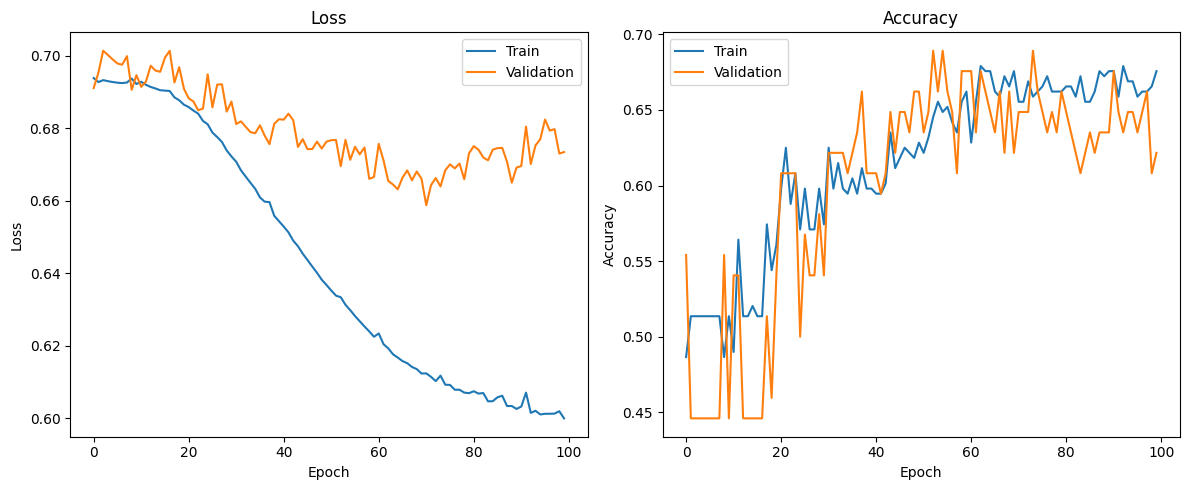

Test Loss: 0.6711, Test Accuracy: 0.5923

Example predictions:
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class DataPreprocessor:
    def __init__(self, X_resampled, y_resampled, X_test, y_test):
        '''
        initiate X and y with resampled values
        initiate X_test and y_test with test values
        '''
        self.X = X_resampled
        self.y = y_resampled
        self.X_test = X_test
        self.y_test = y_test

    def preprocess(self):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        '''
        Initiate weights with random normal numbers. with mean=0 and std=0.01. you need 2 weight matrices.
        from input2hidden and from hidden2output.
        Initiate biase vectors with zeros.
        '''
        self.weights1 = np.random.normal(0,0.01,(input_size, hidden_size))
        self.weights2 = np.random.normal(0,0.01,(hidden_size, output_size))
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        '''
        Implement the sigmoid function.
        '''
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        '''
        Implement the derivative of sigmoid function.
        '''
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward(self, X):
        '''
        Do the forward phase. In this phase first propagate inputs through weights and sum up with biases.
        Then pass the results through activation function.
        '''
        self.z1 = np.dot(X, self.weights1) + self.bias1
        # print(X.shape,self.weights1.shape,self.bias1.shape,self.z1.shape)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        '''
        steps:
        1. The error term for the output layer: calculated as the difference between the predicted output and the true labels (dz2).
        2. Gradients for Output Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the output layer (dw2, db2).
        3. Hidden layer error calculation: calculated by propagating the error back through the weights of the output layer
                                           and applying the derivative of the activation function (dz1).
        4. Gradients for Hidden Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the hidden layer (dw1, db1).
        5. Updating Weights and Biases.
        '''
        m = X.shape[0]
        # print(output,y.shape,y.values.reshape(-1,1))
        dz2 = output - y.values.reshape(-1, 1)
        dw2 = np.dot(self.a1.T, dz2) / m
        # print(dw2.shape,dz2.shape)
        db2 = np.sum(dz2, axis=0) / m
        # print(db2.shape)

        dz1 = np.dot(dz2, self.weights2.T) * self.sigmoid_derivative(self.z1)
        # print(dz1.shape,self.weights2.shape)
        dw1 = np.dot(X.T, dz1) / m
        # print(dw1.shape)
        # print(dz1.shape,type(dz1))
        db1 = np.sum(dz1, axis=0,keepdims=True) / m
        # print(db1.shape)

        self.weights2 -= learning_rate * dw2
        # db2 = db2.values.reshape(-1,1)
        # db1 = db1.values.reshape(1,-1)
        # print(db1.shape,self.bias1.shape)
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1


class Trainer:
    def __init__(self, model, X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.1, batch_size=32):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):
        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train.iloc[indices]
            y_shuffled = self.y_train.iloc[indices]

            for i in range(0, m, self.batch_size):
                ## get the current batch data and calculate the model output. Then update the weights and biases.
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                output = self.model.forward(X_batch)
                self.model.backward(X_batch, y_batch, output, self.learning_rate)

            # Calculate train loss (BinaryCrossEntropy) and accuracy (over 0.5 is 1 else is 0)
            train_output = self.model.forward(self.X_train)
            train_loss = -np.mean(self.y_train * np.log(train_output) + (1 - self.y_train) * np.log(1 - train_output))
            train_accuracy = np.mean((train_output > 0.5).astype(int) == self.y_train)

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val)
            val_loss = -np.mean(self.y_val * np.log(val_output) + (1 - self.y_val) * np.log(1 - val_output))
            val_accuracy = np.mean((val_output > 0.5).astype(int) == self.y_val)

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train')
        plt.plot(self.val_losses, label='Validation')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train')
        plt.plot(self.val_accuracies, label='Validation')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        '''
        first forward the test data in the trained model
        then compute the BCE
        then binary acc.
        '''
        test_output = self.model.forward(self.X_test)
        test_loss = -np.mean(self.y_test * np.log(test_output) + (1 - self.y_test) * np.log(1 - test_output))
        test_accuracy = np.mean((test_output > 0.5).astype(int) == self.y_test)

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output

# Main execution
if __name__ == "__main__":
    # Preprocess data
    preprocessor = DataPreprocessor(liver_x_resampled, liver_y_resampled,liver_x_test, liver_y_test)
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(model, preprocessor.X_train, preprocessor.y_train,
                      preprocessor.X_val, preprocessor.y_val,
                      epochs=100, learning_rate=0.1, batch_size=32)
    trainer.train()

    # Plot results
    trainer.plot_results()

    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    # Print some example predictions
    print("\nExample predictions:")
    for i in range(5):
        true_label = np.argmax(preprocessor.y_test.iloc[i])
        predicted_label = np.argmax(test_output[i])
        print(f"True: {true_label}, Predicted: {predicted_label}")

Epoch 10/100, Train Loss: 0.6842, Train Acc: 0.5635, Val Loss: 0.6815, Val Acc: 0.5802
Epoch 20/100, Train Loss: 0.6207, Train Acc: 0.6827, Val Loss: 0.6075, Val Acc: 0.7222
Epoch 30/100, Train Loss: 0.5881, Train Acc: 0.6889, Val Loss: 0.5849, Val Acc: 0.7222
Epoch 40/100, Train Loss: 0.5782, Train Acc: 0.7012, Val Loss: 0.5786, Val Acc: 0.7346
Epoch 50/100, Train Loss: 0.5734, Train Acc: 0.6981, Val Loss: 0.5755, Val Acc: 0.7407
Epoch 60/100, Train Loss: 0.5697, Train Acc: 0.7105, Val Loss: 0.5766, Val Acc: 0.7407
Epoch 70/100, Train Loss: 0.5661, Train Acc: 0.7059, Val Loss: 0.5753, Val Acc: 0.7407
Epoch 80/100, Train Loss: 0.5622, Train Acc: 0.7074, Val Loss: 0.5786, Val Acc: 0.7284
Epoch 90/100, Train Loss: 0.5580, Train Acc: 0.7152, Val Loss: 0.5796, Val Acc: 0.7284
Epoch 100/100, Train Loss: 0.5536, Train Acc: 0.7198, Val Loss: 0.5827, Val Acc: 0.7284


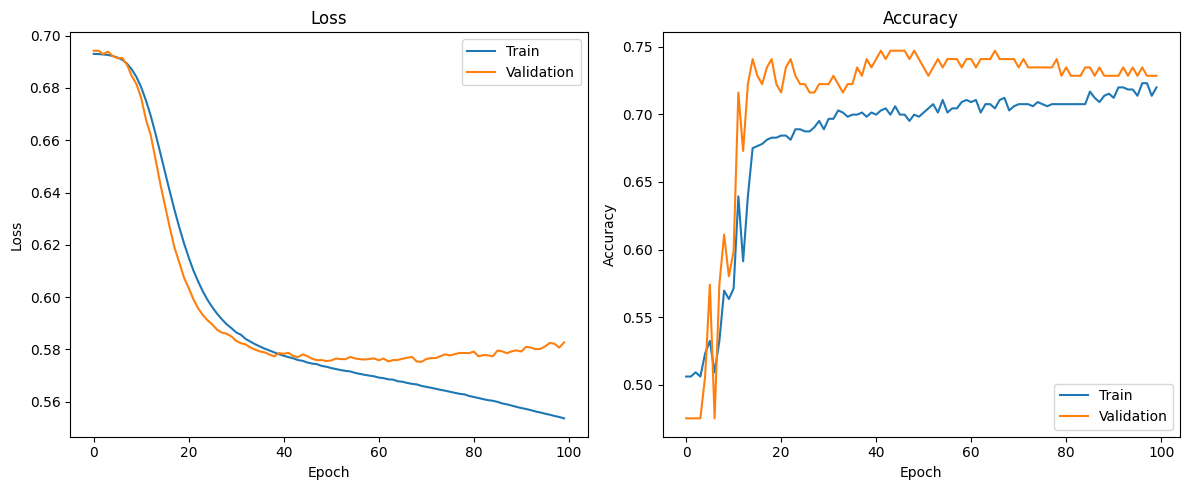

Test Loss: 0.6297, Test Accuracy: 0.6449

Example predictions:
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class DataPreprocessor:
    def __init__(self, x_train, y_train, x_test, y_test):
        '''
        initiate X and y with resampled values
        initiate X_test and y_test with test values
        '''
        self.X = np.array(x_train)
        self.y = np.array(y_train)
        self.X_test = np.array(x_test)
        self.y_test = np.array(y_test)

    def preprocess(self):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        '''
        Initiate weights with random normal numbers with mean=0 and std=0.01.
        You need 2 weight matrices: from input to hidden and from hidden to output.
        Initiate bias vectors with zeros.
        '''
        self.weights1 = np.random.normal(0, 0.01, (input_size, hidden_size))
        self.bias1 = np.zeros((hidden_size, 1))
        self.weights2 = np.random.normal(0, 0.01, (hidden_size, output_size))
        self.bias2 = np.zeros((output_size, 1))


    def sigmoid(self, x):
        '''
        Implement the sigmoid function.
        '''
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        '''
        Implement the derivative of sigmoid function.
        '''
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        '''
        Do the forward phase. In this phase first propagate inputs through weights and sum up with biases.
        Then pass the results through activation function.
        '''

        # print(f"Starting forward: shape of X: {X.shape}")

        self.z1 = np.matmul(self.weights1.T, X) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.matmul(self.weights2.T, self.a1) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        '''
        steps:
        1. The error term for the output layer: calculated as the difference between the predicted output and the true labels (dz2).
        2. Gradients for Output Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the output layer (dw2, db2).
        3. Hidden layer error calculation: calculated by propagating the error back through the weights of the output layer
                                           and applying the derivative of the activation function (dz1).
        4. Gradients for Hidden Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the hidden layer (dw1, db1).
        5. Updating Weights and Biases.
        '''
        m = X.shape[0]

        dz2 = output - y
        dw2 = np.dot(self.a1, dz2.T) / m
        # print(dw2.shape)
        db2 = np.sum(dz2, axis=1, keepdims=True) / m
        # print(dz2.shape)

        dz1 = np.dot(self.weights2, dz2) * self.sigmoid_derivative(self.z1)         # dj / dz1 = dz2 / da1 * da1/dz1
        dw1 = np.dot(X, dz1.T) / m
        db1 = np.sum(dz1, axis=1, keepdims=True) / m

        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2

        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1


def _compute_loss(output, y):
    m = y.shape[1]
    loss = -1/m * np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))
    return loss

def _compute_accuracy(output, y):
    predictions = output > 0.5
    accuracy = np.mean(predictions == y)
    return accuracy



class Trainer:
    def __init__(self, model, X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.1, batch_size=32):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):

        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train[indices]
            y_shuffled = self.y_train[indices]

            for i in range(0, m, self.batch_size):
                ## get the current batch data and calculate the model output. Then update the weights and biases.
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                output = self.model.forward(X_batch.T)
                self.model.backward(X_batch.T, y_batch.T, output, self.learning_rate)

            # Calculate train loss (BinaryCrossEntropy) and accuracy (over 0.5 is 1 else is 0)
            train_output = self.model.forward(self.X_train.T)
            train_loss = _compute_loss(train_output, self.y_train.T)
            train_accuracy = _compute_accuracy(train_output, self.y_train.T)

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val.T)
            val_loss = _compute_loss(val_output, self.y_val.T)
            val_accuracy = _compute_accuracy(val_output, self.y_val.T)

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train')
        plt.plot(self.val_losses, label='Validation')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train')
        plt.plot(self.val_accuracies, label='Validation')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        '''
        first forward the test data in the trained model
        then compute the BCE
        then binary acc.
        '''
        test_output = self.model.forward(self.X_test.T)
        test_loss = _compute_loss(test_output, self.y_test.T)
        test_accuracy = _compute_accuracy(test_output, self.y_test.T)

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output

# Main execution
if __name__ == "__main__":
    # Preprocess data
    preprocessor = DataPreprocessor(cancer_x_resampled, cancer_y_resampled, cancer_x_test, cancer_y_test)
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(model, preprocessor.X_train, preprocessor.y_train,
                      preprocessor.X_val, preprocessor.y_val,
                      epochs=100, learning_rate=0.1, batch_size=32)
    trainer.train()

    # Plot results
    trainer.plot_results()



    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    # print(test_output.shape)

    # Print some example predictions
    print("\nExample predictions:")
    for i in range(5):
        true_label = np.argmax(preprocessor.y_test[i])
        predicted_label = np.argmax(test_output[:, i])
        print(f"True: {true_label}, Predicted: {predicted_label}")

In [ ]:
import pandas as pd
import numpy as np
a = pd.DataFrame([[1,2],[3,4]])
b = np.array([[1,2],[3,4]])

print(a)

   0  1
0  1  2
1  3  4


Epoch 10/150, Train Loss: 0.6467, Train Acc: 0.6316, Val Loss: 0.6302, Val Acc: 0.6852
Epoch 20/150, Train Loss: 0.6072, Train Acc: 0.6594, Val Loss: 0.5996, Val Acc: 0.7037
Epoch 30/150, Train Loss: 0.5949, Train Acc: 0.6842, Val Loss: 0.5995, Val Acc: 0.7099
Epoch 40/150, Train Loss: 0.5891, Train Acc: 0.6920, Val Loss: 0.5927, Val Acc: 0.7284
Epoch 50/150, Train Loss: 0.5873, Train Acc: 0.6873, Val Loss: 0.6030, Val Acc: 0.6914
Epoch 60/150, Train Loss: 0.5834, Train Acc: 0.6904, Val Loss: 0.6001, Val Acc: 0.7222
Epoch 70/150, Train Loss: 0.5828, Train Acc: 0.6796, Val Loss: 0.5972, Val Acc: 0.7037
Epoch 80/150, Train Loss: 0.5805, Train Acc: 0.6997, Val Loss: 0.5920, Val Acc: 0.7222
Epoch 90/150, Train Loss: 0.5787, Train Acc: 0.6966, Val Loss: 0.5978, Val Acc: 0.6914
Epoch 100/150, Train Loss: 0.5763, Train Acc: 0.6966, Val Loss: 0.5975, Val Acc: 0.6975
Epoch 110/150, Train Loss: 0.5745, Train Acc: 0.7028, Val Loss: 0.5900, Val Acc: 0.7222
Epoch 120/150, Train Loss: 0.5736, Train 

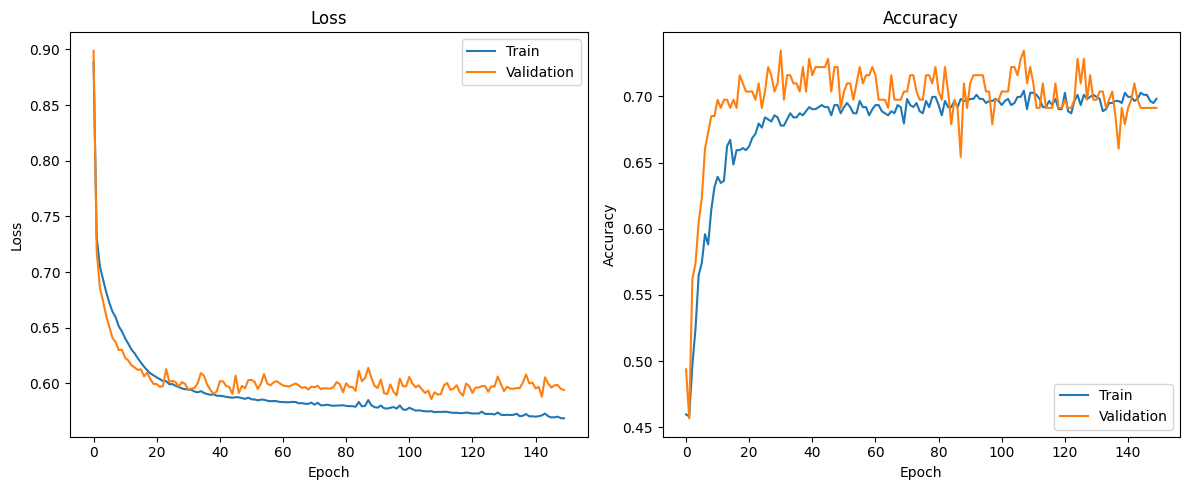

Test Loss: 0.6348, Test Accuracy: 0.6476

Example predictions:
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class DataPreprocessor:
    def __init__(self, X_resampled, y_resampled, X_test, y_test):
        '''
        initiate X and y with resampled values
        initiate X_test and y_test with test values
        '''
        self.X = X_resampled
        self.y = y_resampled
        self.X_test = X_test
        self.y_test = y_test

    def preprocess(self):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        '''
        Initiate weights with random normal numbers. with mean=0 and std=0.01. you need 2 weight matrices.
        from input2hidden and from hidden2output.
        Initiate biase vectors with zeros.
        '''
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        '''
        Implement the sigmoid function.
        '''
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        '''
        Implement the derivative of sigmoid function.
        '''
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward(self, X):
        '''
        Do the forward phase. In this phase first propagate inputs through weights and sum up with biases.
        Then pass the results through activation function.
        '''
        # print(X)
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        '''
        steps:
        1. The error term for the output layer: calculated as the difference between the predicted output and the true labels (dz2).
        2. Gradients for Output Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the output layer (dw2, db2).
        3. Hidden layer error calculation: calculated by propagating the error back through the weights of the output layer
                                           and applying the derivative of the activation function (dz1).
        4. Gradients for Hidden Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the hidden layer (dw1, db1).
        5. Updating Weights and Biases.
        '''
        m = X.shape[0]

        dz2 = output - y.values.reshape(-1, 1)
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.weights2.T) * self.sigmoid_derivative(self.a1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1


class Trainer:
    def __init__(self, model, X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.1, batch_size=32):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):
        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train.iloc[indices]
            y_shuffled = self.y_train.iloc[indices]

            for i in range(0, m, self.batch_size):
                ## get the current batch data and calculate the model output. Then update the weights and biases.
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                output = self.model.forward(X_batch)
                self.model.backward(X_batch, y_batch, output, self.learning_rate)

            # Calculate train loss (BinaryCrossEntropy) and accuracy (over 0.5 is 1 else is 0)
            train_output = self.model.forward(self.X_train)
            train_loss = -np.mean(self.y_train * np.log(train_output) + (1 - self.y_train) * np.log(1 - train_output))
            train_accuracy = np.mean((train_output > 0.5).astype(int) == self.y_train)

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val)
            val_loss = -np.mean(self.y_val * np.log(val_output) + (1 - self.y_val) * np.log(1 - val_output))
            val_accuracy = np.mean((val_output > 0.5).astype(int) == self.y_val)

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train')
        plt.plot(self.val_losses, label='Validation')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train')
        plt.plot(self.val_accuracies, label='Validation')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        '''
        first forward the test data in the trained model
        then compute the BCE
        then binary acc.
        '''
        test_output = self.model.forward(self.X_test)
        test_loss = -np.mean(self.y_test * np.log(test_output) + (1 - self.y_test) * np.log(1 - test_output))
        test_accuracy = np.mean((test_output > 0.5).astype(int) == self.y_test)

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output

# Main execution
if __name__ == "__main__":
    a = 0
    # Preprocess data
    preprocessor = DataPreprocessor(cancer_x_resampled, cancer_y_resampled,cancer_x_test, cancer_y_test)
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(model, preprocessor.X_train, preprocessor.y_train,
                      preprocessor.X_val, preprocessor.y_val,
                      epochs=150, learning_rate=0.1, batch_size=32)
    trainer.train()

    # Plot results
    trainer.plot_results()

    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    # Print some example predictions
    print("\nExample predictions:")
    for i in range(5):
        true_label = np.argmax(preprocessor.y_test.iloc[i])
        predicted_label = np.argmax(test_output[i])
        print(f"True: {true_label}, Predicted: {predicted_label}")